In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CSV 파일 로드
csv_path = "dataset/output.csv"  # CSV 경로 (필요에 따라 수정)
df = pd.read_csv(csv_path)

# 'West-East' 방향만 필터링
df_we = df[df["Direction"] == "West-East"]

df_we

,Direction,Sub-Direction,Distance,LST Value
0,West-East,West,0,305.09848
1,West-East,West,1,305.06570
2,West-East,West,2,304.98413
3,West-East,West,3,304.87802
4,West-East,West,4,304.84912
...,...,...,...,...
1251,West-East,East,626,NaN
1252,West-East,East,627,NaN
1253,West-East,East,628,NaN
1254,West-East,East,629,NaN


In [14]:
# 서쪽(West)과 동쪽(East) 데이터 분리
west_df = df_we[df_we["Sub-Direction"] == "West"].sort_values("Distance", ascending=False)
east_df = df_we[df_we["Sub-Direction"] == "East"].sort_values("Distance", ascending=True)

# ✅ West의 Distance 값을 음수로 변환하고 정렬
west_df = west_df.sort_values("Distance", ascending=True)  # 0, 1, 2, 3 → 올바른 순서로 정렬
west_df["Distance"] = -west_df["Distance"]  # 음수 변환 (-1, -2, -3 ...)

# ✅ East는 기존대로 유지
east_df = east_df.sort_values("Distance", ascending=True)  # 0, 1, 2, 3 → 정상 순서 유지

# X축: 거리 (West는 음수, East는 양수)
full_distance = list(west_df["Distance"]) + list(east_df["Distance"])
full_lst_values = list(west_df["LST Value"]) + list(east_df["LST Value"])



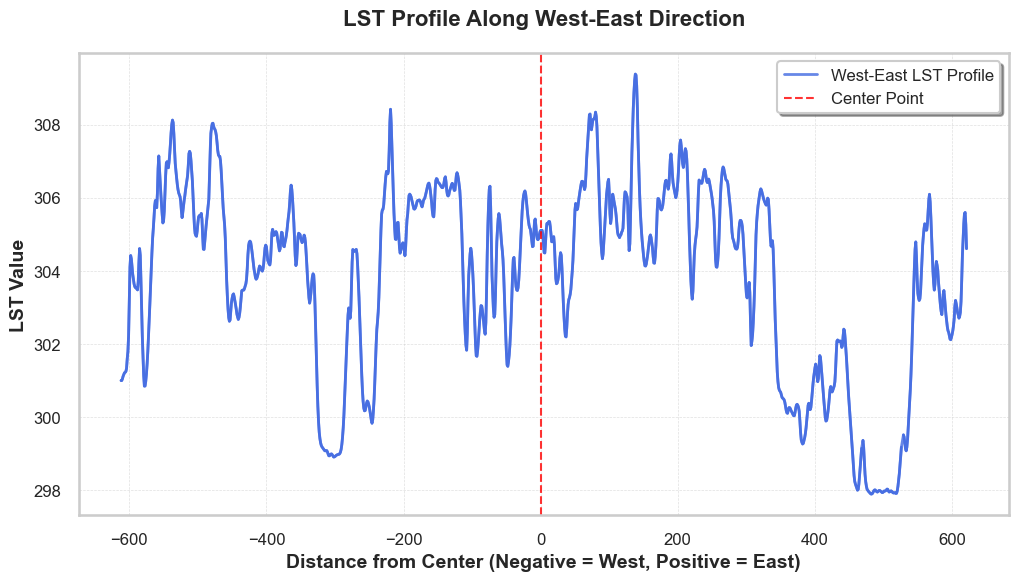

In [18]:
# Seaborn 스타일 적용 (고급 스타일)
sns.set_style("whitegrid")
sns.set_context("talk")  # 글자 크기 조정

# 그래프 크기 조정
plt.figure(figsize=(12, 6))

# 선 그래프 스타일 개선
plt.plot(full_distance, full_lst_values, 
         linestyle="-", linewidth=2, color="royalblue", alpha=0.8, 
         label="West-East LST Profile")

# 점 대신 부드러운 곡선 (보간법 적용)
sns.lineplot(x=full_distance, y=full_lst_values, 
             color="royalblue", linewidth=2, alpha=0.8)

# 중심선 스타일 변경 (더 얇고 점선 강조)
plt.axvline(x=0, color="red", linestyle="--", linewidth=1.5, alpha=0.8, label="Center Point")

# X축 & Y축 라벨 폰트 스타일 조정
plt.xlabel("Distance from Center (Negative = West, Positive = East)", fontsize=14, fontweight="bold")
plt.ylabel("LST Value", fontsize=14, fontweight="bold")

# 타이틀 더 크게 & 볼드 처리
plt.title("LST Profile Along West-East Direction", fontsize=16, fontweight="bold", pad=20)

# 그리드 스타일 변경 (점선 & 투명도 조정)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# 범례 위치 및 크기 조정
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True)

# X축 눈금 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 출력
plt.show()


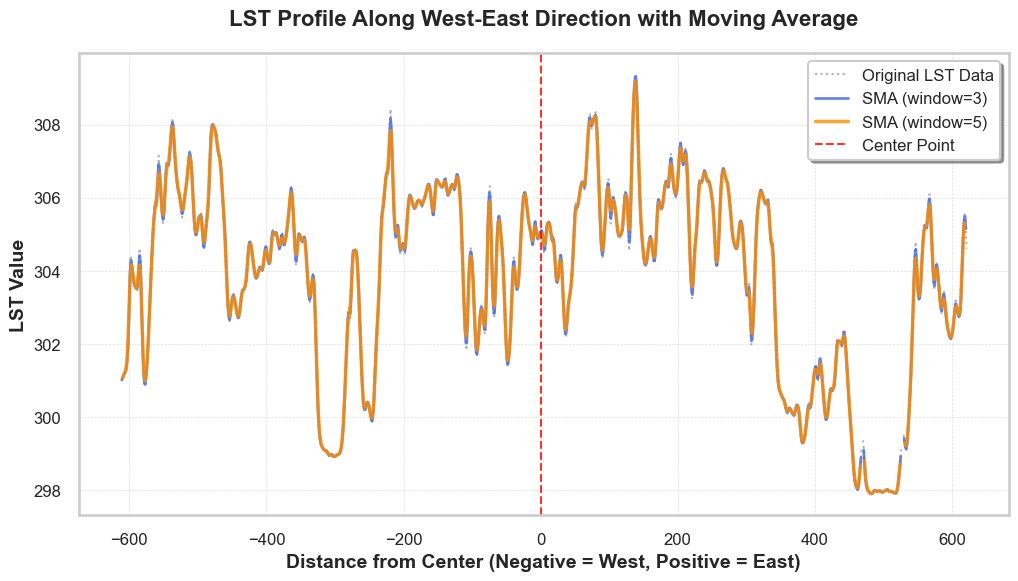

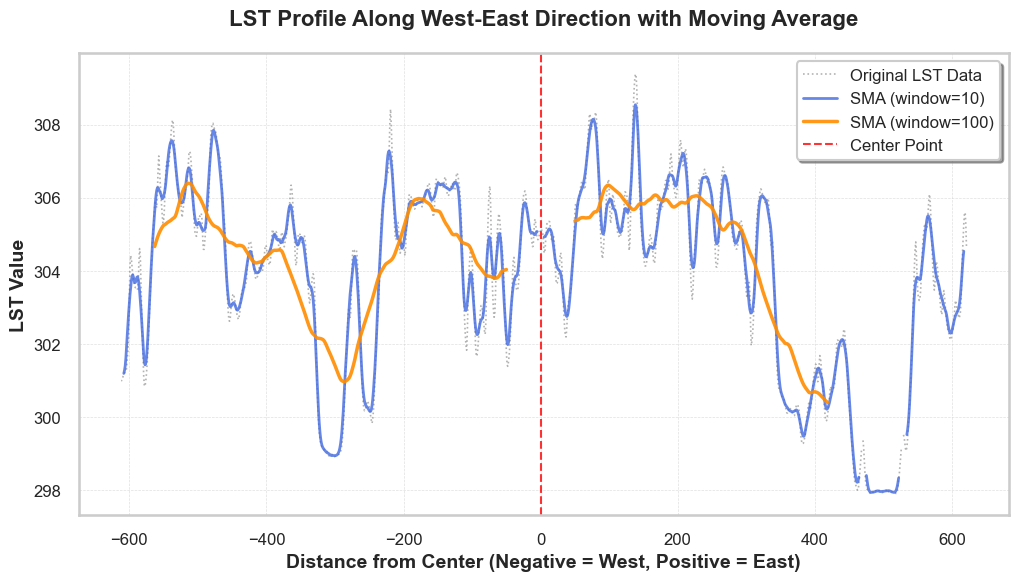

In [20]:
# Seaborn 스타일 적용
sns.set_style("whitegrid")
sns.set_context("talk")  # 글자 크기 조정

# 이동평균 계산 (SMA: Simple Moving Average)
df_plot = pd.DataFrame({"Distance": full_distance, "LST Value": full_lst_values})
df_plot["SMA_3"] = df_plot["LST Value"].rolling(window=3, center=True).mean()
df_plot["SMA_5"] = df_plot["LST Value"].rolling(window=5, center=True).mean()

# 그래프 크기 조정
plt.figure(figsize=(12, 6))

# 원본 데이터 (점선)
plt.plot(df_plot["Distance"], df_plot["LST Value"], 
         linestyle="dotted", linewidth=1.5, color="gray", alpha=0.6, 
         label="Original LST Data")

# 3개 이동평균선
plt.plot(df_plot["Distance"], df_plot["SMA_3"], 
         linestyle="-", linewidth=2, color="royalblue", alpha=0.8, 
         label="SMA (window=3)")

# 5개 이동평균선
plt.plot(df_plot["Distance"], df_plot["SMA_5"], 
         linestyle="-", linewidth=2.5, color="darkorange", alpha=0.8, 
         label="SMA (window=5)")

# 중심선 (0 거리)
plt.axvline(x=0, color="red", linestyle="--", linewidth=1.5, alpha=0.8, label="Center Point")

# X축 & Y축 라벨 조정
plt.xlabel("Distance from Center (Negative = West, Positive = East)", fontsize=14, fontweight="bold")
plt.ylabel("LST Value", fontsize=14, fontweight="bold")

# 타이틀 & 레이아웃 정리
plt.title("LST Profile Along West-East Direction with Moving Average", fontsize=16, fontweight="bold", pad=20)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# 범례 조정
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True)

# X축 눈금 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 출력
plt.show()# Seaborn 스타일 적용
sns.set_style("whitegrid")
sns.set_context("talk")  # 글자 크기 조정

# 이동평균 계산 (SMA: Simple Moving Average)
df_plot = pd.DataFrame({"Distance": full_distance, "LST Value": full_lst_values})
df_plot["SMA_10"] = df_plot["LST Value"].rolling(window=10, center=True).mean()
df_plot["SMA_100"] = df_plot["LST Value"].rolling(window=100, center=True).mean()

# 그래프 크기 조정
plt.figure(figsize=(12, 6))

# 원본 데이터 (점선)
plt.plot(df_plot["Distance"], df_plot["LST Value"], 
         linestyle="dotted", linewidth=1.2, color="gray", alpha=0.6, 
         label="Original LST Data")

# 10개 이동평균선 (단기 변화)
plt.plot(df_plot["Distance"], df_plot["SMA_10"], 
         linestyle="-", linewidth=2, color="royalblue", alpha=0.8, 
         label="SMA (window=10)")

# 100개 이동평균선 (장기 변화)
plt.plot(df_plot["Distance"], df_plot["SMA_100"], 
         linestyle="-", linewidth=2.5, color="darkorange", alpha=0.9, 
         label="SMA (window=100)")

# 중심선 (0 거리)
plt.axvline(x=0, color="red", linestyle="--", linewidth=1.5, alpha=0.8, label="Center Point")

# X축 & Y축 라벨 조정
plt.xlabel("Distance from Center (Negative = West, Positive = East)", fontsize=14, fontweight="bold")
plt.ylabel("LST Value", fontsize=14, fontweight="bold")

# 타이틀 & 레이아웃 정리
plt.title("LST Profile Along West-East Direction with Moving Average", fontsize=16, fontweight="bold", pad=20)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# 범례 조정
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True)

# X축 눈금 스타일 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 출력
plt.show()

